# Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, Reshape,
                                     Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input)
from tensorflow.keras.datasets import mnist

2024-06-27 11:02:11.179556: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 11:02:11.208257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 11:02:11.638571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
latent_space_size = 10

def get_random_input_vector(laten_space_size):
    
    #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    
    random_vector = np.random.rand(latent_space_size)
    
    return random_vector

random_vector = get_random_input_vector(latent_space_size)
print(random_vector)
print(random_vector.shape)

[0.14393982 0.30164386 0.12902798 0.2122722  0.19980937 0.20259125
 0.10834731 0.84683114 0.74705581 0.74092229]
(10,)


In [3]:
def make_generator_model():
    model = keras.Sequential()
    latent_space_size = random_vector.shape

    # Input layer
    model.add(Input(shape=latent_space_size))

    # Foundation for 7x7 image
    model.add(Dense(128))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    # Reshape to 28x28x1 for MNIST images
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,608 (5.73 MB)

 Trainable params: 1,498,768 (5.72 MB)

 Non-trainable params: 3,840 (15.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


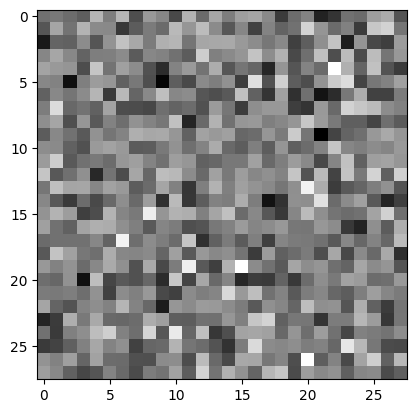

In [4]:
generator = make_generator_model()
generator.summary()

# Generate an image using the generator model
generated_image = generator.predict(np.expand_dims(random_vector, axis=0))
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.show()

### Import Mnist dataset

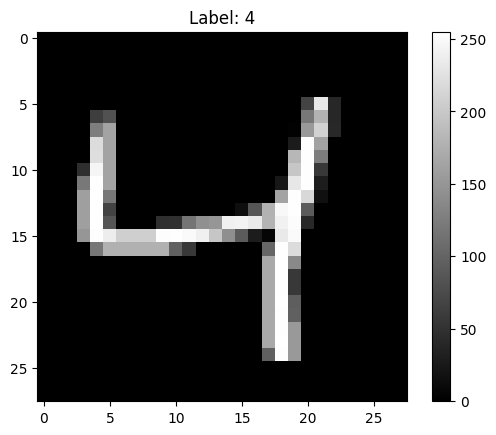

In [5]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Utiliser un tout ensemble pour la rapidité
y = mnist.target.astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]

X.iloc[0]


# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()


# Visualize the first image
visualize_image(2, X, y)

# Discriminator

In [6]:
def discriminator_model():
    model = keras.Sequential()

    model.add(Input(shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [7]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    
    print('real_loss', real_loss)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    print('fake_loss', fake_loss)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [8]:
# Training loop
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [9]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

In [10]:
# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = tf.reshape(predictions, (-1, 28, 28))  # Reshape to [batch_size, 28, 28]

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

In [11]:
   # Load the dataset
(train_images, train_labels), (_, _) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

# Hyperparameters
BUFFER_SIZE = 60000
BATCH_SIZE = 256
NOISE_DIM = 100

generator = make_generator_model()
discriminator = make_discriminator_model()

# Define the loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

EPOCHS = 50

# Train the GAN
train(train_dataset, EPOCHS)

# Generate some test noise samples
test_input = tf.random.normal([16, NOISE_DIM])
generate_and_save_images(generator, EPOCHS, test_input)


AttributeError: load_data